### This Time i'll do in depth EDA to Netflix movies & TV show and also gonna create content based recommendation 🎥🍿



<center>
    <figure>
        <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExMDdpYjhvZjRubjV6bDM2M2FyOTAyNHVoZzdrODJ4MXgza2dpYmM5dyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/nxC1YCvGlsLDVGZ2Vt/giphy.gif"  style='width:30%;'>
    </figure>
</center>


In [1]:
# Import All Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots



# OTT Movies Dataset

#### Let's look dataset

In [2]:
# Loading dataset

OTT = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
OTT.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Dataset 

* Looks like dataset contain details about movies & Tv shows such as title, director, cast, relased year, rating, duration, description etc.

In [3]:
OTT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* Total 12 cloumns with many cloumns having null values

In [4]:
## here dataset contain details about both movies and shows so let's make two diffrent dataframes for this two.
OTT_movies = OTT[OTT['type'] == 'Movie']
OTT_shows = OTT[OTT['type'] == 'TV Show']

In [5]:
#OTT_movies.head()

# data preprocessing

In [6]:
OTT.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

* handling date_added column 

In [7]:
OTT[OTT['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


we can't able to find date_added from internet as well as they are only 10 rows so i will drop them


In [8]:
OTT = OTT[OTT['date_added'].notna()]

In [9]:
OTT.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


* now let's handle missing values(7) of rating

In [10]:
OTT['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [11]:
OTT[OTT['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


we can find missing values from internet and replace them

In [12]:
rating_replacement = {
    5889 : 'TV-14',
    6827 : 'TV-14',
    7312 : 'PG-13',
    7537 : 'TV-Y'
}

for id, rating in rating_replacement.items():
    OTT.iloc[id, 8] = rating


* director: i think its not needed to handle missing values 
* cast: this var has too many diferent values too so there is no muich information out there to handle
* country: we can impute mode values but missing values is high so avoid it here

* Before starting working with date related columns we need to transform them 

#### now let's modify some of features and it's datatype

In [13]:
OTT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      6173 non-null   object
 4   cast          7972 non-null   object
 5   country       7967 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.4+ KB


In [14]:
OTT['year_added'] = OTT['date_added'].apply(lambda x : x.split(', ')[-1])
OTT['month_added'] = OTT['date_added'].apply(lambda x : x.split(' ')[0])
#OTT['year_added'].head()
#OTT['month_added'].head()

In [15]:
OTT['season_count'] = OTT.apply(lambda x :str(x['duration']).split(" ")[0] if "Season" in str(x['duration']) else "", axis = 1)
OTT['duration'] = OTT.apply(lambda x : str(x['duration']).split(" ")[0] if "Season" not in str(x['duration']) else "", axis = 1)
OTT.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,September,
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,2


In [16]:
OTT.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
year_added      object
month_added     object
season_count    object
dtype: object

In [17]:
# year_added convert to integer
OTT['year_added'] = pd.to_numeric(OTT['year_added'])

OTT['duration'] = pd.to_numeric(OTT['duration'], errors='coerce')

# type convert to category
#OTT['type'] = pd.Categorical(OTT['type'])

In [18]:
OTT.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration        float64
listed_in        object
description      object
year_added        int64
month_added      object
season_count     object
dtype: object

# univariate analysis

####  1.Content type on OTT

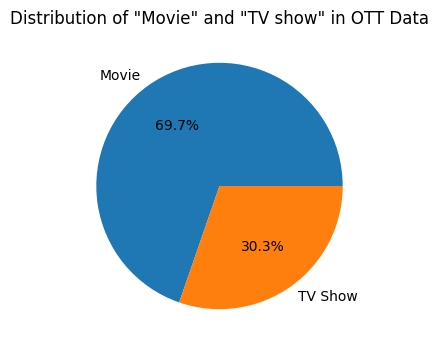

In [19]:
type_count = OTT['type'].value_counts()
#type_count
labels = type_count.index
sizes = type_count.values

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of "Movie" and "TV show" in OTT Data')
plt.show()

#### 2. Movie rating 

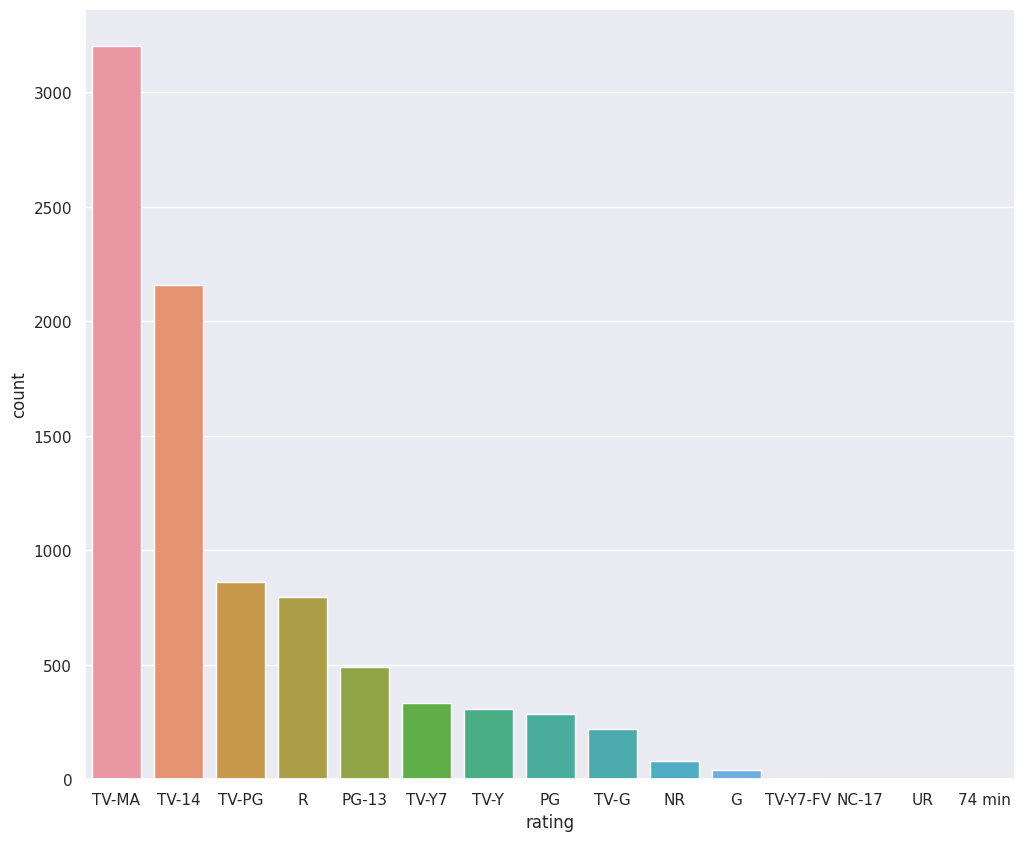

In [20]:
plt.figure(figsize=(12, 10))
sns.set(style = 'darkgrid')
ax = sns.countplot(x='rating', data=OTT, order=OTT['rating'].value_counts().index[0:15])

* Most movies are under rating 'TV-MA'. this rating associated with TV parential guidelines to a television program that was designed for mature audience only.


#### 3. country

let's find out contry with highest no of movies & shows

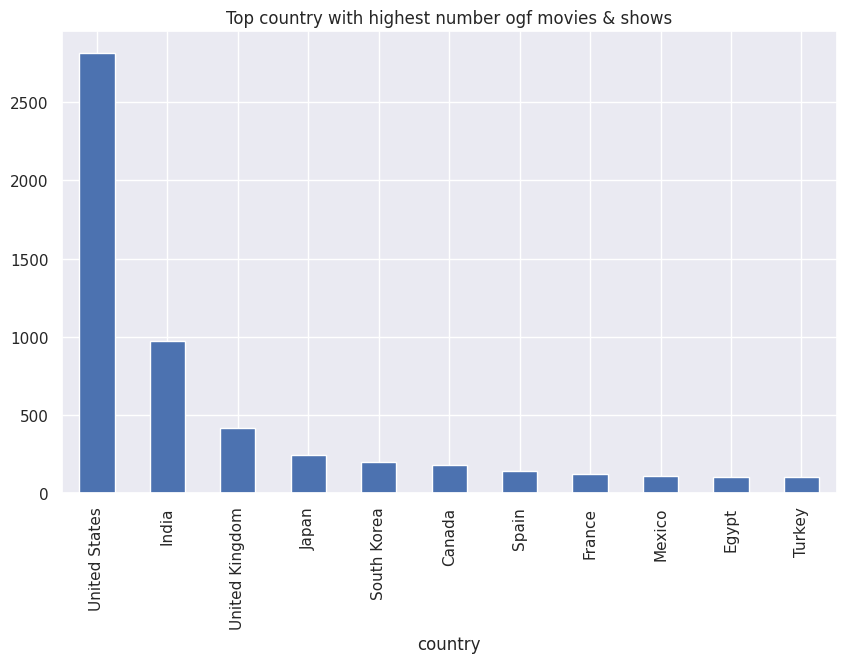

In [21]:
country_count = OTT['country'].value_counts()[:11]

country_count.plot(kind='bar', figsize=(10,6))

plt.title('Top country with highest number ogf movies & shows')
plt.show()

#### 4. distribution of content realesed


In [22]:
released_year_ott = OTT.loc[OTT['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_ott = OTT.loc[OTT['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_ott.loc[released_year_ott['type'] == 'Movie']['release_year'], 
    y=released_year_ott.loc[released_year_ott['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))

fig.add_trace(go.Scatter( 
    x=released_year_ott.loc[released_year_ott['type'] == 'TV Show']['release_year'], 
    y=released_year_ott.loc[released_year_ott['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))

fig.add_trace(go.Scatter( 
    x=added_year_ott.loc[added_year_ott['type'] == 'Movie']['year_added'], 
    y=added_year_ott.loc[added_year_ott['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))

fig.add_trace(go.Scatter( 
    x=added_year_ott.loc[added_year_ott['type'] == 'TV Show']['year_added'], 
    y=added_year_ott.loc[added_year_ott['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))

fig.show()

/tmp/ipykernel_18/3568770603.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='release_year'>

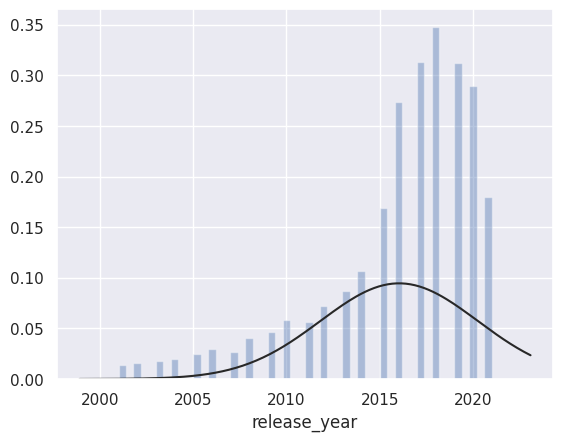

In [23]:
from scipy.stats import norm

sns.distplot(OTT.loc[OTT['release_year'] > 2000, 'release_year'], fit=norm, kde=False)

* intersting 2017 was the year when most of the movies were released

#### 5. analysis on duration of movies

/tmp/ipykernel_18/4146698287.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




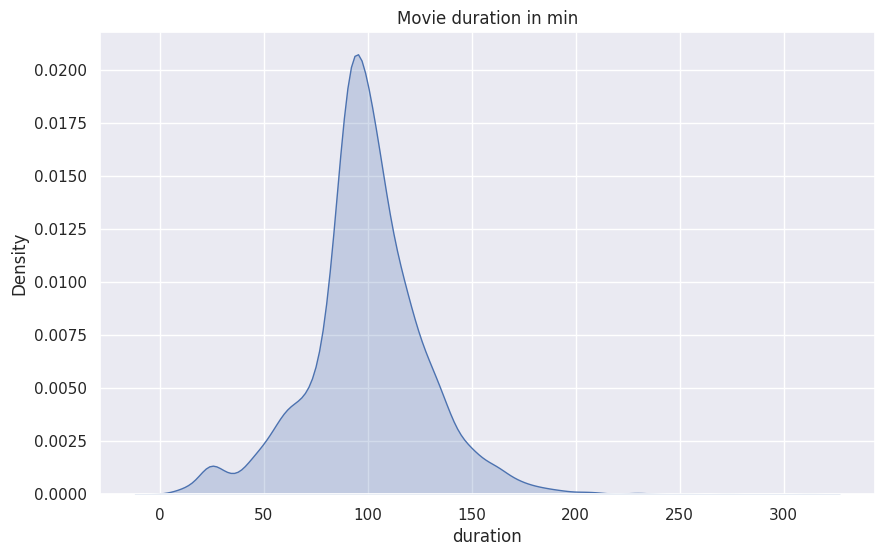

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=OTT['duration'], shade=True)


plt.title("Movie duration in min")
plt.show()

# mutivariate analysis

#### Movie & TV shows Genre relation

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

In [26]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [27]:
OTT['genre'] = OTT['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
OTT['genre'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre, dtype: object

In [28]:
def top_genres(df, title='Top ones'):
    genres_df = calculate_mlb(OTT['genre'])
    tdata = genres_df.sum().sort_values(ascending=False)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [29]:
top_genres(OTT, title='Top movies and shows Genres')

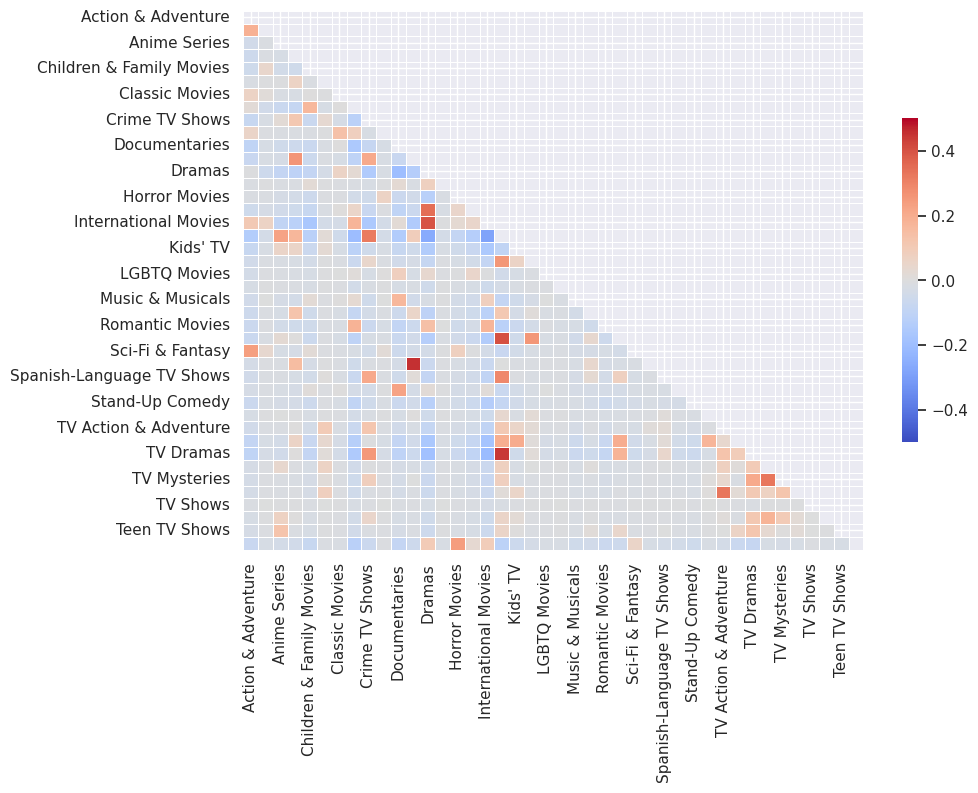

In [30]:
genres_df = calculate_mlb(OTT['genre'])

corr = genres_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

##### top genres relese by year

In [31]:
def check_genre_contains(genres):
    for genre in genres:
        if genre in top_movies_genres:
            return True
    return False

In [32]:
OTT['principal_genre'] = OTT['genre'].apply(lambda genres: genres[0])
OTT['principal_genre'].head()

0             Documentaries
1    International TV Shows
2            Crime TV Shows
3                Docuseries
4    International TV Shows
Name: principal_genre, dtype: object

In [33]:
top_movies_genres = [
    'International Movies',
    'Dramas',
    'Comedies',
    'Documentaries',
    'Action & Adventure',
]

In [34]:
year_genre_df = OTT[(OTT['principal_genre'].isin(top_movies_genres)) & (OTT['year_added'] >= 2017)].groupby(['principal_genre', 'year_added']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'year_added', 'count']

fig = px.sunburst(year_genre_df, path=['year_added', 'principal_genre'], values='count')
fig.show()

# recommendation system

function for cleaning data

In [35]:
def clean_data(x):
    return str.lower(x.replace(" ", ""))

In [36]:
filldna = OTT.fillna('')

features for content based filtering

In [37]:
features=['title','director','cast','listed_in','description']
filldna = filldna[features]

In [38]:
for feature in features:
    filldna[feature] = filldna[feature].apply(clean_data)
    
filldna.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


In [39]:
def create_tags(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [40]:
filldna['tags'] = filldna.apply(create_tags, axis=1)

now let's used count vectorizer and then find cosine similarity

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filldna['tags'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [42]:
filldna=filldna.reset_index()
indices = pd.Series(filldna.index, index=filldna['title'])

In [43]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return OTT['title'].iloc[movie_indices]

In [44]:
get_recommendations_new('Kota Factory', cosine_sim)

2982                                        Find Yourself
1038                                       Dancing Angels
7438                     Melodies of Life - Born This Way
3293                                        Little Things
6508    Club Friday To Be Continued - My Beautiful Tomboy
7872                                           Rishta.com
3463                                      College Romance
4171                                    The Perfect Match
4487                                 Accidentally in Love
5703                                          Refresh Man
Name: title, dtype: object

####                                                                    That's all 
####                                                                    Do Upvote!!!


<center>
    <figure>
        <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExa2JxYnBodzlqZ3hoYW9mZjhpYndpaTFkNndydWhnMGkyNHA2ZTB0NiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/MKoyVvDRQvVAZbv4GD/giphy.gif"  style='width:30%;'>
    </figure>
</center>